# Machine Learning

**Representation Learning (Network Embedding)**: Task which aims to learn a mapping function *f*:*G* -> $R^n$, from discrete to continuous domain. Function *f* will be capable of performing low-dimensional vector representation such that (local and global) properties of graph *G* are preserved. <br>
Once mapping *f* is learned, it can be applied to the graph as the resulting mapping can be used as a feature set for a ML algorithm.

These can generate vector representation of nodes (**node embedding**) or edges (**edge embedding**). Which try to build a vector space such that the geometric relationships in the new space reflect the structure of the original graph, nodes or edges. So similar structures will have a small *Euclidean* distances, whilst dissimilar will have a large *Euclidean* distance. Most embedding algorithms generate mapping in Euclidean vector spaces, recent interest however has shown interest in non-Euclidean mapping functions.

Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 192.98it/s]


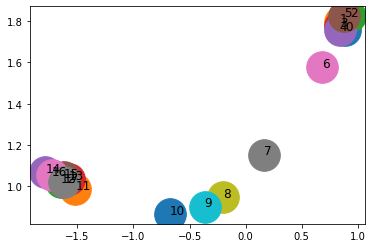

In [1]:
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt

G = nx.barbell_graph(m1=7, m2=4) # generate barbell graph
# node2vec to map node to vector of two dimensions
node2vec = Node2Vec(G, dimensions=2) 
model = node2vec.fit(window=10)

# plot two-dimensional vectors of original nodes in embedding space
fig, ax = plt.subplots()
for x in G.nodes():
    v = model.wv.get_vector(str(x))
    ax.scatter(v[0], v[1], s=1000)
    ax.annotate(str(x), (v[0], v[1]), fontsize=12)

We see how good Node2Vec is at discriminating groups from each other because the algorithm uses neighbouring information of each node to generate the representation. We can clearly discriminate the two groups.

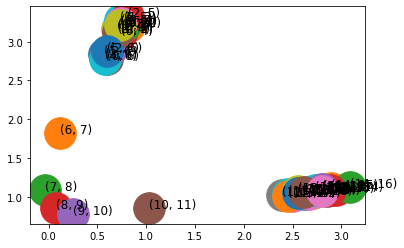

In [2]:
from node2vec.edges import HadamardEmbedder
# hadamard embedder to map edge to vector of two dimensions
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

# plot on graph
fig, ax = plt.subplots()
for x in G.edges():
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0], v[1], s=1000)
    ax.annotate(str(x), (v[0], v[1]), fontsize=12)

We can see that edge embedding identifies similar edges.

**Graph2Vec** Maps a single graph to a vector.

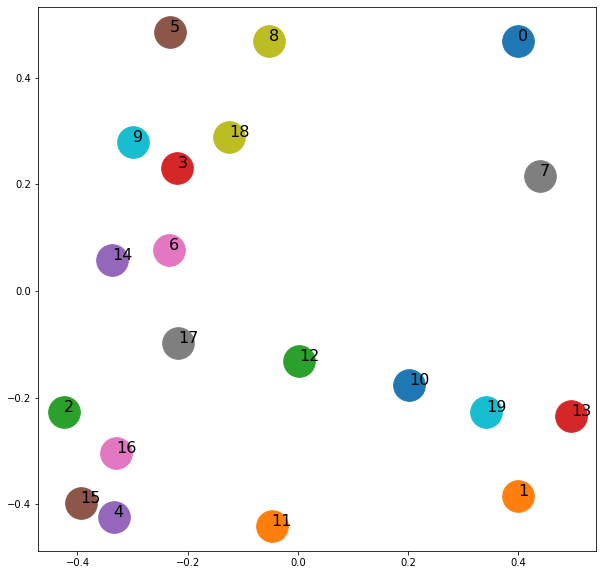

In [10]:
import random
import matplotlib.pyplot as plt
from karateclub import Graph2Vec

n_graphs = 20
def generate_random():
    n = random.randint(5, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n,k,p) # generate with random parameters

Gs = [generate_random() for x in range(n_graphs)]

# generate two-dimensional vector representation of each graph
model = Graph2Vec(dimensions=2)
model.fit(Gs)
embeddings = model.get_embedding()

# plot generated vectors in Euclidean space
fig, ax = plt.subplots(figsize=(10,10))
for i, vec in enumerate(embeddings):
    ax.scatter(vec[0], vec[1], s=1000)
    ax.annotate(str(i), (vec[0], vec[1]), fontsize=16)

Various methods of node embeddings, typically two main types:
-  **Transductive**: If new nodes are provided, transductive methods update the model (eg. re-train) to infer new information about the nodes 
-  **Inductive**: Expected to generalize to new nodes, edges, or graphs that were not observed during training


At some point, a common taxonomy was defined, https://arxiv.org/abs/2005.03675, under which we have two fundamental concepts:
-  **Encoder(ENC)**: Maps input to embedding space
-  **Decoder(DEC)**: Decodes structural information about graph from learned embedding

The idea is that: If we can encode a graph such that the decoder can retrieve all the necessary information, then the embedding must contain a compressed version of the information and thus can be used for downstream ML tasks. In many graph-based ML algorithms, the decoder is usually designed to map pairs of node embeddings to a real value, usually representing the proximity (distance) of nodes in the original graphs. We may be able to get embedding representation DEC(zi, zj) = 1 if in the input graph an edge connecting the two nodes zi, zj exists. In practice, more effective proximity functions can be used to measure the similarity between nodes.